In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
bj = pd.read_csv('bj_dataset.csv')

In [4]:
bj.head()

,cards_remaining,dealer_up,true_count,win,initial_sum,double,move
0,416,10,0,1.0,21,0,1.0
1,411,10,0,1.0,10,1,2.0
2,406,6,0,1.0,13,0,1.0
3,401,10,0,0.0,14,0,2.0
4,395,8,0,-1.0,16,0,2.0


## Modeling

### Data Splitting/Scaling

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X = bj.drop(labels=['move', 'win'], axis=1)
y = bj['move']

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

### Logistic Regression Model

In [9]:
from sklearn.linear_model import LogisticRegression
LRModel = LogisticRegression()
LRModel.fit(X_train, y_train)

LogisticRegression()

In [10]:
LRMpred = LRModel.predict(X_test)

### K-Nearest Neighbors

In [11]:
from sklearn.neighbors import KNeighborsClassifier

In [12]:
error_rate = []

for i in range(3, 15):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(np.abs(pred_i - y_test)))


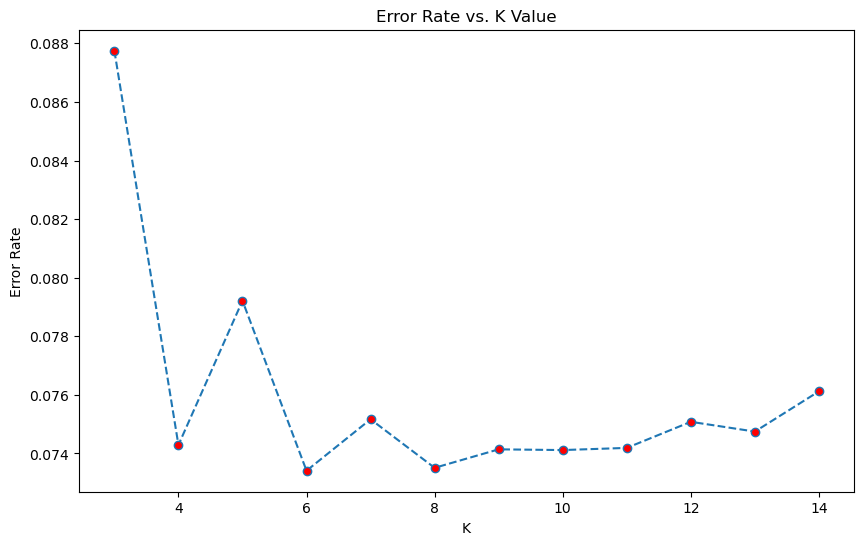

In [13]:
plt.figure(figsize=(10,6))
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

plt.plot(range(3, 15), error_rate, marker = 'o', linestyle='--', markerfacecolor='red')

In [14]:
knn = KNeighborsClassifier(n_neighbors=6)

knn.fit(X_train,y_train)
KNNpred = knn.predict(X_test)

## Model Evaluations

### Logistic Regression Model

In [15]:
from sklearn.metrics import confusion_matrix, classification_report

In [16]:
print("Confusion Matrix for Logistic Model: \n")
print(confusion_matrix(y_test, LRMpred))

Confusion Matrix for Logistic Model: 

[[36022  2805     0     0]
 [ 4751 25300   809   214]
 [ 1507  5927  1339   208]
 [  987   190     0   787]]


In [17]:
print("Classification Report for Logistic Model: \n\n" + classification_report(y_test, LRMpred))

Classification Report for Logistic Model: 

              precision    recall  f1-score   support

         1.0       0.83      0.93      0.88     38827
         2.0       0.74      0.81      0.77     31074
         3.0       0.62      0.15      0.24      8981
         4.0       0.65      0.40      0.50      1964

    accuracy                           0.78     80846
   macro avg       0.71      0.57      0.60     80846
weighted avg       0.77      0.78      0.76     80846



### K-Nearest Neighbors

In [18]:
print("Confusion Matrix for K-Nearest Neighbors: \n")
print(confusion_matrix(y_test,KNNpred))

Confusion Matrix for K-Nearest Neighbors: 

[[38679    71    74     3]
 [ 1944 29101    24     5]
 [ 1671    99  7211     0]
 [   83    19     1  1861]]


In [19]:
print("Classification Report for K-Nearest Neighbors: \n\n" + classification_report(y_test, KNNpred))

Classification Report for K-Nearest Neighbors: 

              precision    recall  f1-score   support

         1.0       0.91      1.00      0.95     38827
         2.0       0.99      0.94      0.96     31074
         3.0       0.99      0.80      0.89      8981
         4.0       1.00      0.95      0.97      1964

    accuracy                           0.95     80846
   macro avg       0.97      0.92      0.94     80846
weighted avg       0.95      0.95      0.95     80846



## Model Test Inputs

In [20]:
bj.head()

,cards_remaining,dealer_up,true_count,win,initial_sum,double,move
0,416,10,0,1.0,21,0,1.0
1,411,10,0,1.0,10,1,2.0
2,406,6,0,1.0,13,0,1.0
3,401,10,0,0.0,14,0,2.0
4,395,8,0,-1.0,16,0,2.0


In [21]:
# TODO: NOT TESTED / COMPLETE
def true_count(run_count, cards_remaining, card_values=[]):
    init_num_decks = 8
    for card in card_values:
        if card > 2 and card < 7: run_count += 1
        elif card == 10 or card == 11: run_count -= 1
    decks = cards_remaining / 52.0
    print(decks)
    
    trueCount = run_count / decks
    
    return trueCount

In [22]:
print(true_count(2, 391, card_values=[10, 3, 9]))

7.519230769230769
0.2659846547314578


In [27]:
def standardize_input(value, mean, std):
    """Standardize a single input value based on mean and standard deviation."""
    return (value - mean) / std

def standardize_inputs(input1, input2, input3, input4, input5):
    """
    Standardize four inputs based on their respective means and standard deviations.
    
    Args:
    - input1 (cards), input2 (dealer_up), input3 (count), input4 (isum): The numeric values to be standardized.
    - stats: A list of tuples, where each tuple contains the mean and standard deviation
             for the inputs in the order (mean, std). It's expected to have 4 tuples.
             
    Returns:
    - A list of the standardized values.
    """
    standardized_values = []
    stats = [(scaler.mean_[0], scaler.scale_[0]), (scaler.mean_[1], scaler.scale_[1]), (scaler.mean_[2], scaler.scale_[2]), (scaler.mean_[3], scaler.scale_[3]), (scaler.mean_[4], scaler.scale_[4])]  # Example stats: [(mean1, std1), (mean2, std2), ...]
    
    for i, (mean, std) in enumerate(stats):
        value = locals()[f'input{i+1}']
        standardized_values.append(standardize_input(value, mean, std))
    
    return standardized_values




In [28]:
# Example usage
input_values = [416, 10, 0, 21, 0]

standardized_inputs = standardize_inputs(*input_values)
print("Standardized Inputs:", standardized_inputs)

Standardized Inputs: [1.7026748072268942, 1.0485871509480043, -0.015514953544418786, 1.5216362585026921, -0.42311910158643284]


### Logistic

In [29]:
# 1 - stand, 2 - hit, 3 - double, 4 - split
def LRPrediction(cards_remaining, dealer_up, true_count, initial_sum, double):
    move = LRModel.predict([standardize_inputs(cards_remaining, dealer_up, true_count, initial_sum, double)])[0]
    
    if move == 1: return "Stand"
    elif move == 2: return "Hit"
    elif move == 3: return "Double"
    elif move == 4: return "Split"
    else: return "Error"

In [31]:
LRPrediction(406, 6, 0, 13, 0)

'Hit'

### KNN

In [34]:
# 1 - stand, 2 - hit, 3 - double, 4 - split
def knnPrediction(cards_remaining, dealer_up, true_count, initial_sum, double):
    move = knn.predict([standardize_inputs(cards_remaining, dealer_up, true_count, initial_sum, double)])[0]
    
    if move == 1: return "Stand"
    elif move == 2: return "Hit"
    elif move == 3: return "Double"
    elif move == 4: return "Split"
    else: return "Error"

In [35]:
knn.predict([standardize_inputs(411, 10, 0, 10, 1)])

array([2.])

In [36]:
knnPrediction(406, 6, 0, 13, 0)

'Stand'